# Polo's Workspace

## Introduction
The data set was donated to us by an unnamed company handling flight ticket reservations. The data is thin, it contains
<ul>
<li> the date of departure
<li> the departure airport
<li> the arrival airport
<li> the mean and standard deviation of the number of weeks of the reservations made before the departure date
<li> a field called <code>log_PAX</code> which is related to the number of passengers (the actual number were changed for privacy reasons)
</ul>

The goal is to predict the <code>log_PAX</code> column. The prediction quality is measured by RMSE. 

The data is obviously limited, but since data and location informations are available, it can be joined to external data sets. <b>The challenge in this RAMP is to find good data that can be correlated to flight traffic</b>.

In [2]:
%matplotlib inline
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns; sns.set()

## We load the data and vizualize

In [2]:
problem = imp.load_source('', 'problem.py')
X_df, y_array = problem.get_train_data()

In [3]:
print('first date: ', min(X_df['DateOfDeparture']))
print('last date: ', max(X_df['DateOfDeparture']))

first date:  2011-09-01
last date:  2013-03-05


In [4]:
X_df.head(10)

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd
0      2012-06-19       ORD     DFW         12.875000  9.812647
1      2012-09-10       LAS     DEN         14.285714  9.466734
2      2012-10-05       DEN     LAX         10.863636  9.035883
3      2011-10-09       ATL     ORD         11.480000  7.990202
4      2012-02-21       DEN     SFO         11.450000  9.517159
5      2013-01-22       ATL     MCO         10.363636  8.232025
6      2011-10-20       SFO     LAS         15.266667  9.808277
7      2012-01-28       EWR     ORD          8.588235  6.165010
8      2012-05-27       ATL     CLT         10.238095  6.609877
9      2013-02-22       ATL     DEN          8.294118  5.542616

In [5]:
y_array[:10]

array([12.33129622, 10.77518151, 11.08317675, 11.16926784, 11.26936373,
       12.07364919, 11.17393612,  9.5999524 ,  9.17564514, 10.73431968])

In [6]:
X_df['log_PAX'] = y_array
cols = X_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_df = X_df[cols]
X_df.head()

log_PAX DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd
0  12.331296      2012-06-19       ORD     DFW         12.875000  9.812647
1  10.775182      2012-09-10       LAS     DEN         14.285714  9.466734
2  11.083177      2012-10-05       DEN     LAX         10.863636  9.035883
3  11.169268      2011-10-09       ATL     ORD         11.480000  7.990202
4  11.269364      2012-02-21       DEN     SFO         11.450000  9.517159

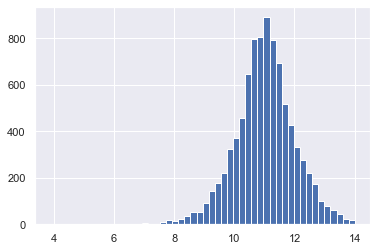

In [7]:
plt.hist(y_array, bins=50);

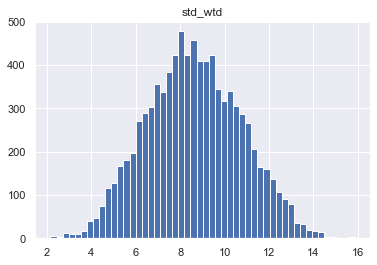

In [8]:
X_df.hist('std_wtd', bins=50);

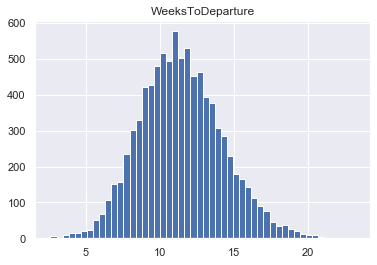

In [9]:
X_df.hist('WeeksToDeparture', bins=50);

In [13]:
X_df['WeeksToDeparture'].corr(X_df[ 'std_wtd'])
# Il y a une très forte corrélation, on peut surement faire quelque chose

0.8749986085613998

In [8]:
import pandas_profiling
X_df.profile_report()

## We download the external dataset

In [30]:
X_encoded = X_df
external_data = pd.read_csv('submissions/starting_kit/external_data.csv')
external_data = external_data[['Date', 'AirPort', 'Mean TemperatureC', 'MeanDew PointC', 
                               'Mean Humidity', 'Mean VisibilityKm', 'Mean Wind SpeedKm/h', 
                               'CloudCover']]
external_data = external_data.rename(
            columns={'Date': 'DateOfDeparture', 'AirPort': 'Arrival'})
X_encoded = pd.merge(
            X_encoded, external_data, how='left',
            left_on=['DateOfDeparture', 'Arrival'],
            right_on=['DateOfDeparture', 'Arrival'],
            sort=False)
X_encoded.head()

log_PAX DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0  12.331296      2012-06-19       ORD     DFW         12.875000  9.812647   
1  10.775182      2012-09-10       LAS     DEN         14.285714  9.466734   
2  11.083177      2012-10-05       DEN     LAX         10.863636  9.035883   
3  11.169268      2011-10-09       ATL     ORD         11.480000  7.990202   
4  11.269364      2012-02-21       DEN     SFO         11.450000  9.517159   

   Mean TemperatureC  MeanDew PointC  Mean Humidity  Mean VisibilityKm  \
0                 29              21             63                 16   
1                 25              -6             14                 16   
2                 19              16             77                 13   
3                 19              10             58                 16   
4                 12               8             79                 12   

   Mean Wind SpeedKm/h  CloudCover  
0                   29           5  
1                   15           3  
2                    8           5  
3                    6           1  
4                    8           7

## organization of the data set

In [23]:
#import pandas_profiling
#X_encoded.profile_report()

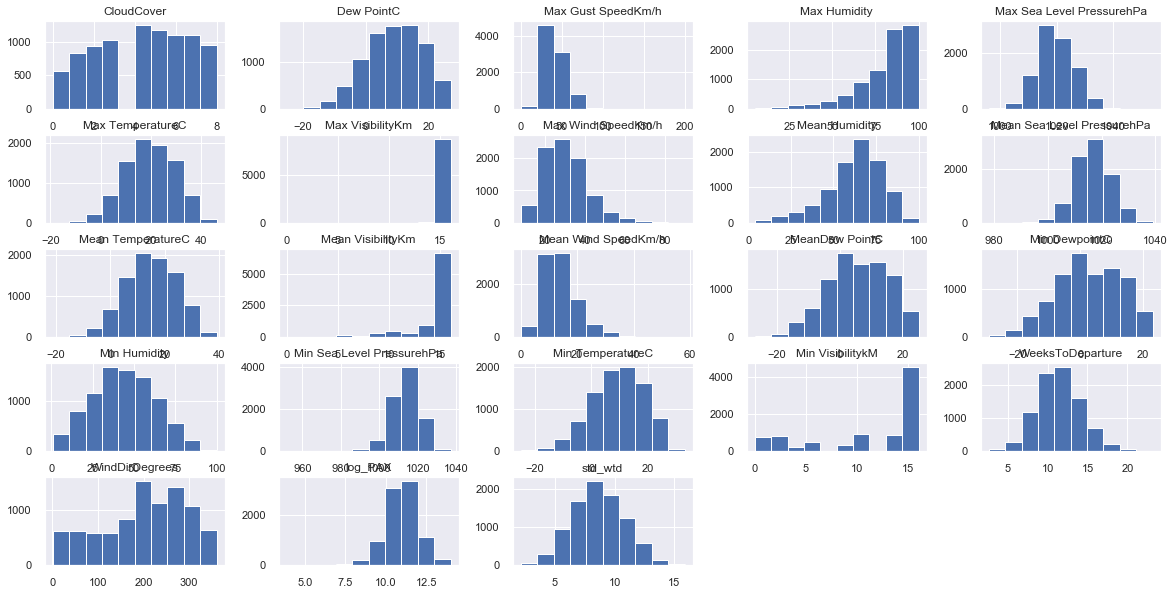

In [24]:
_ = X_encoded.hist(figsize=(20, 10))

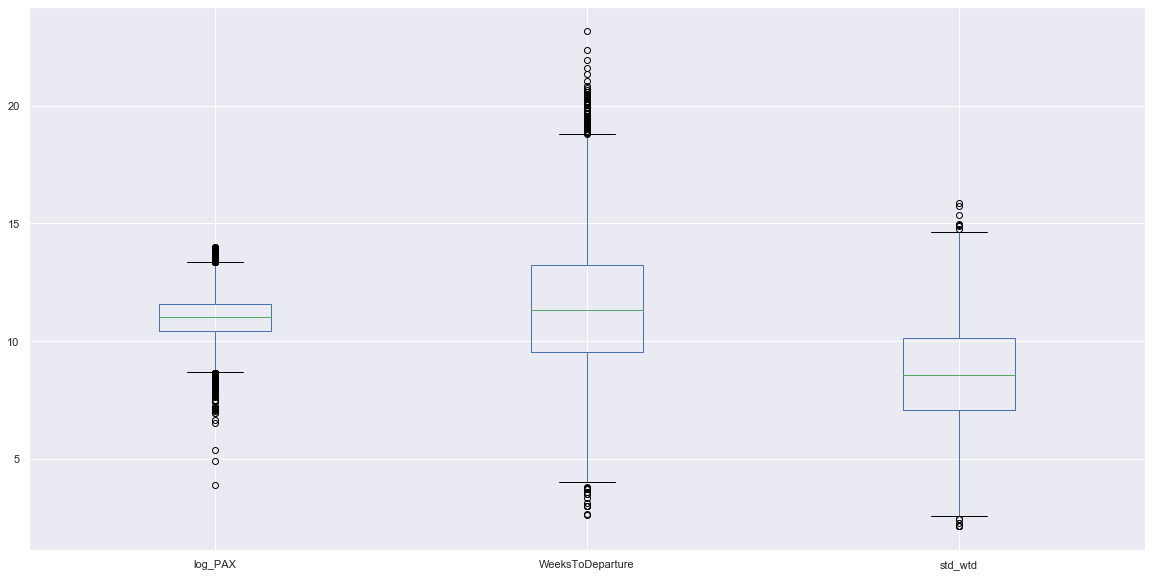

In [10]:
plt.subplots(figsize=(20, 10))
X_df.boxplot()

In [20]:
X_encoded = X_df

In [21]:
X_encoded['DateOfDeparture'] = pd.to_datetime(X_encoded['DateOfDeparture'])
X_encoded['year'] = X_encoded['DateOfDeparture'].dt.year
X_encoded['month'] = X_encoded['DateOfDeparture'].dt.month
X_encoded['day'] = X_encoded['DateOfDeparture'].dt.day
X_encoded['weekday'] = X_encoded['DateOfDeparture'].dt.weekday
X_encoded['week'] = X_encoded['DateOfDeparture'].dt.week
X_encoded['n_days'] = X_encoded['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

X_encoded = X_encoded.join(pd.get_dummies(X_encoded['year'], prefix='y'))
#X_encoded = X_encoded.join(pd.get_dummies(X_encoded['month'], prefix='m'))
#X_encoded = X_encoded.join(pd.get_dummies(X_encoded['day'], prefix='d'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['weekday'], prefix='wd'))
#X_encoded = X_encoded.join(pd.get_dummies(X_encoded['week'], prefix='w'))

X_encoded = X_encoded.drop(['year', 'month', 'day', 'weekday', 'week', 'n_days'], axis=1)

X_encoded = X_encoded.drop('DateOfDeparture', axis=1)

In [22]:
X_encoded.head()

log_PAX Departure Arrival  WeeksToDeparture   std_wtd  y_2011  y_2012  \
0  12.331296       ORD     DFW         12.875000  9.812647       0       1   
1  10.775182       LAS     DEN         14.285714  9.466734       0       1   
2  11.083177       DEN     LAX         10.863636  9.035883       0       1   
3  11.169268       ATL     ORD         11.480000  7.990202       1       0   
4  11.269364       DEN     SFO         11.450000  9.517159       0       1   

   y_2013  wd_0  wd_1  wd_2  wd_3  wd_4  wd_5  wd_6  
0       0     0     1     0     0     0     0     0  
1       0     1     0     0     0     0     0     0  
2       0     0     0     0     0     1     0     0  
3       0     0     0     0     0     0     0     1  
4       0     0     1     0     0     0     0     0

In [23]:
import pandas_profiling
X_encoded.profile_report()

In [29]:
X_time = X_encoded.iloc[:,:]
X_time.drop(['Max'])
X_time.head()

log_PAX Departure Arrival  WeeksToDeparture   std_wtd  Max_TemperatureC  \
0  12.331296       ORD     DFW         12.875000  9.812647                34   
1  10.775182       LAS     DEN         14.285714  9.466734                33   
2  11.083177       DEN     LAX         10.863636  9.035883                22   
3  11.169268       ATL     ORD         11.480000  7.990202                27   
4  11.269364       DEN     SFO         11.450000  9.517159                16   

   Mean_TemperatureC  Min_TemperatureC  Dew_PointC  MeanDew_PointC  \
0                 29                24          22              21   
1                 25                16          -2              -6   
2                 19                16          17              16   
3                 19                11          12              10   
4                 12                 8          10               8   

   Min_DewpointC  Max_Humidity  Mean_Humidity  Min_Humidity  \
0             19            82             63            44   
1             -8            21             14             7   
2             14            93             77            61   
3              9            83             58            33   
4              7            93             79            64   

   Max_Sea_Level_PressurehPa  Mean_Sea_Level_PressurehPa  \
0                       1012                        1010   
1                       1011                        1008   
2                       1018                        1016   
3                       1028                        1026   
4                       1027                        1025   

   Min_Sea_Level_PressurehPa  Max_VisibilityKm  Mean_VisibilityKm  \
0                       1009                16                 16   
1                       1005                16                 16   
2                       1014                16                 13   
3                       1024                16                 16   
4                       1024                16                 12   

   Min_VisibilitykM  Max_Wind_SpeedKm/h  Mean_Wind_SpeedKm/h  \
0                16                  48                   29   
1                16                  35                   15   
2                 8                  24                    8   
3                16                  23                    6   
4                 3                  24                    8   

   Max_Gust_SpeedKm/h Precipitationmm  CloudCover Events  WindDirDegrees  \
0                60.0            0.00           5    NaN             161   
1                42.0            0.00           3    NaN             207   
2                29.0            0.00           5    Fog             266   
3                29.0            0.00           1    NaN              93   
4                29.0            0.00           7    NaN             300   

   y_2011  y_2012  y_2013  m_1  m_2  m_3  m_4  m_5  m_6  m_7  m_8  m_9  m_10  \
0       0       1       0    0    0    0    0    0    1    0    0    0     0   
1       0       1       0    0    0    0    0    0    0    0    0    1     0   
2       0       1       0    0    0    0    0    0    0    0    0    0     1   
3       1       0       0    0    0    0    0    0    0    0    0    0     1   
4       0       1       0    0    1    0    0    0    0    0    0    0     0   

   m_11  m_12  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0     0     0    0    0    0    0    0    0    0    0    0     0     0     0   
1     0     0    0    0    0    0    0    0    0    0    0     1     0     0   
2     0     0    0    0    0    0    1    0    0    0    0     0     0     0   
3     0     0    0    0    0    0    0    0    0    0    1     0     0     0   
4     0     0    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  \
0     0     0     0     0     0     0     1     0     0     0     0

# Modify date

In [20]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [26]:
X_encoded = X_df
X_encoded['DateOfDeparture'] = pd.to_datetime(X_encoded['DateOfDeparture'])
X_encoded['year'] = X_encoded['DateOfDeparture'].dt.year
X_encoded['month'] = X_encoded['DateOfDeparture'].dt.month
X_encoded['day'] = X_encoded['DateOfDeparture'].dt.day
X_encoded['weekday'] = X_encoded['DateOfDeparture'].dt.weekday
X_encoded['week'] = X_encoded['DateOfDeparture'].dt.week
X_encoded['n_days'] = X_encoded['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("2011-09-01")).days)
X_encoded.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  year  month  \
0      2012-06-19       ORD     DFW         12.875000  9.812647  2012      6   
1      2012-09-10       LAS     DEN         14.285714  9.466734  2012      9   
2      2012-10-05       DEN     LAX         10.863636  9.035883  2012     10   
3      2011-10-09       ATL     ORD         11.480000  7.990202  2011     10   
4      2012-02-21       DEN     SFO         11.450000  9.517159  2012      2   

   day  weekday  week  n_days  
0   19        1    25     292  
1   10        0    37     375  
2    5        4    40     400  
3    9        6    40      38  
4   21        1     8     173

In [30]:
X_encoded = X_encoded.sort_values('DateOfDeparture')
X_encoded.head()

In [23]:
daX_encoded['n_days'].unique().sum()

152076

In [21]:
X_encoded.sort_values("n_days", axis=1, ascending=True, inplace=False, kind='quicksort', na_position='last')

KeyError: 'n_days'

In [16]:
sample

NameError: name 'sample' is not defined

In [ ]:
sample = data[:168]
ax = sample['hour'].plot()

In [17]:
month1 = list(np.arange(1, 32))
month2 = list(np.arange(1, 31))
month3 = list(np.arange(1, 32))
months = month1 + month2 + month3
print(months)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


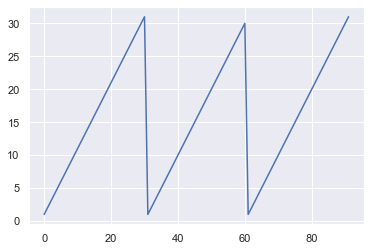

In [19]:
plt.plot(months)

In [34]:
data = pd.DataFrame(months, columns =['month'])
data.head()

month
0      1
1      2
2      3
3      4
4      5

In [40]:
months_encode = encode(data, 'month', 32)
months_encode.head()

month  month_sin  month_cos
0      1   0.195090   0.980785
1      2   0.382683   0.923880
2      3   0.555570   0.831470
3      4   0.707107   0.707107
4      5   0.831470   0.555570

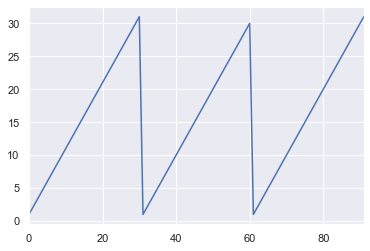

In [44]:
months_encode['month'].plot()
plt.savefig("figure1.png")

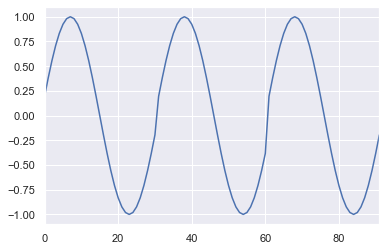

In [45]:
months_encode['month_sin'].plot()
plt.savefig("figure2.png")

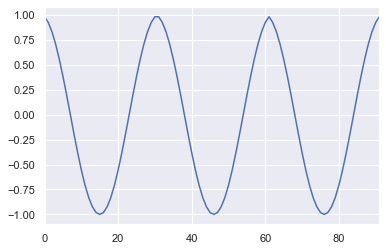

In [46]:
months_encode['month_cos'].plot()
plt.savefig("figure3.png")